The term "fuzzy logic" refers to a special type of logic where propositions are not merely TRUE or FALSE but instead can take any truth value between 0 ("pure" FALSE) and 1 ("pure" TRUE). For instance, a truth value of 0.5 is indeterminate; it is just as likely to be TRUE as FALSE.

This concept may seem counter-intuitive. If presented with a statement, such as "John is wearing a green shirt", most people would think that the statement must be either TRUE or FALSE. Clearly, there's no in-between, right? However, even in this simple case, there's some ambiguity about the color green. What if John is wearing a sea-green shirt? Does that count as green or blue? What if it leans much more towards the blue end of the spectrum? Or, even more confusingly, what if the person who made the statement is color-blind? The [blue/white gold/black dress](https://www.nytimes.com/interactive/2015/02/28/science/white-or-blue-dress.html) phenomenon taught us that color can sometimes be very ambiguous.

As another practical example, people's feelings about temperature can be difficult to quantify in terms of absolute limits. Is 75 degrees (F) "hot"? Is it "warm"? Maybe it depends on where you live, or perhaps it could be a little bit of both "warm" **and** "hot"? Fuzzy logic is a great choice for modeling this situation: at 75 degrees, you can assign some membership to both the "warm" and "hot" states. For instance, you might say 75 degrees is 70% "warm" and 30% "hot". Practically no one, though, would think that 75 degrees (F) is "cold". You can confidently assign a membership of 0% to "cold" at 75 degrees.

How do we want to specify these membership probabilities at different temperatures? Well, it would take a very long time to go through each temperature and assign probabilities for "cold", "warm", and "hot". There's a shortcut we can use to make this easier. 76 degrees is clearly more "hot" than 75 degrees, so we wouldn't expect the "hot" membership of 76 degrees to be less than the "hot" membership at 75 degrees. We can assign functions to "cold", "warm", and "hot" that take these intuitions into account.

One of the more common membership functions is a triangle, given its relatively easy-to-define shape. 3 values are defined: lower, full, and upper. The lower and upper values have a membership of 0%, and the full value has a membership of 100%. All values in between are linearly interpolated.

For example, if we defined the triangular membership function for "warm" as [50, 70, 100], the membership would be 0% at 50 degrees, linearly increase to 100% at 70 degrees, and linearly decrease to 0% at 100 degrees. Generalizing to four different judgements about temperature, the following code will demonstrate linear, triangular fuzzy logic membership functions for each.

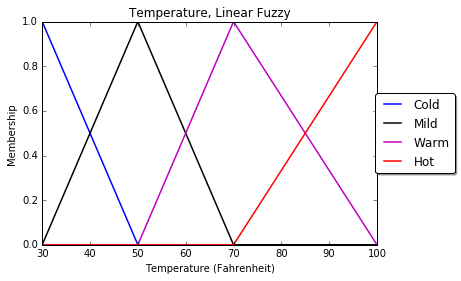

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(30, 100, 0.1)
## LINEAR
# Create the membership functions
x_cold_lin = fuzz.trimf(x, [30, 30, 50])
x_mild_lin = fuzz.trimf(x, [30, 50, 70])
x_warm_lin = fuzz.trimf(x, [50, 70, 100])
x_hot_lin = fuzz.trimf(x, [70, 100, 100])

# Plot the results of the linear fuzzy membership
plt.figure()
plt.plot(x, x_cold_lin, 'b', linewidth=1.5, label='Cold')
plt.plot(x, x_mild_lin, 'k', linewidth=1.5, label='Mild')
plt.plot(x, x_warm_lin, 'm', linewidth=1.5, label='Warm')
plt.plot(x, x_hot_lin, 'r', linewidth=1.5, label='Hot')
plt.title('Temperature, Linear Fuzzy')
plt.ylabel('Membership')
plt.xlabel('Temperature (Fahrenheit)')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
          ncol=1, fancybox=True, shadow=True);

As can be seen in the figure above, each state ("cold", "mild", "warm", and "hot") has a membership value defined at all temperatures between 30 and 100 degrees (F). This was accomplished easily by defining the following triangular functions for each state:

* Cold - [30, 30, 50]
* Mild - [30, 50, 70]
* Warm - [50, 70, 100]
* Hot - [70, 100, 100]

Where the first value in the array is the "low" (0%) value, the second is the "full" (100%) value, and the third is the "high" (0%) value. Below 30 degrees, we can assume that "cold" has 100% membership and all other judgements have 0% membership. Likewise, above 100 degrees, we can assume that "hot" has 100% membership and all other judgements have 0% membership.

Notice that "warm" has a wider distribution than the other states. This occurred because warm is an even more "fuzzy" word than the other words- people generally tend to disagree strongly about exactly what the word "warm" means. Fuzzy logic allows us to quantify this disagreement as a function with a higher standard deviation.

Let's examine a more complicated Gaussian distribution as a membership function. In this case, we will be specifying a mean and standard deviation for each Gaussian distribution.

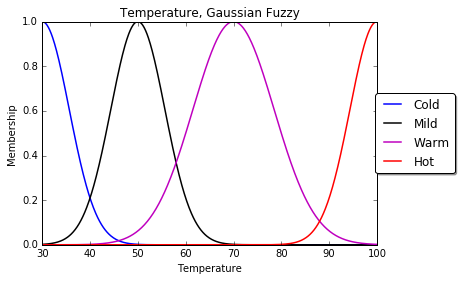

In [2]:
## GAUSSIAN 
# Create the membership functions
x_cold_gauss = fuzz.gaussmf(x, 30, 8)
x_mild_gauss = fuzz.gaussmf(x, 50, 8)
x_warm_gauss = fuzz.gaussmf(x, 70, 12)
x_hot_gauss = fuzz.gaussmf(x, 100, 8)

# Plot the results of the gaussian fuzzy membership
plt.figure()
plt.plot(x, x_cold_gauss, 'b', linewidth=1.5, label='Cold')
plt.plot(x, x_mild_gauss, 'k', linewidth=1.5, label='Mild')
plt.plot(x, x_warm_gauss, 'm', linewidth=1.5, label='Warm')
plt.plot(x, x_hot_gauss, 'r', linewidth=1.5, label='Hot')
plt.title('Temperature, Gaussian Fuzzy')
plt.ylabel('Membership')
plt.xlabel('Temperature')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
          ncol=1, fancybox=True, shadow=True);

Looking at the figure above, values tend to be more heavily concentrated around the "full" membership values, dropping off more steeply than the triangular membership function. This might be preferential behavior, depending on the system that's being modeled.

You might also notice that the membership functions no longer sum to 100%. Let's examine this further by plotting the membership sum at each temperature in the following code.

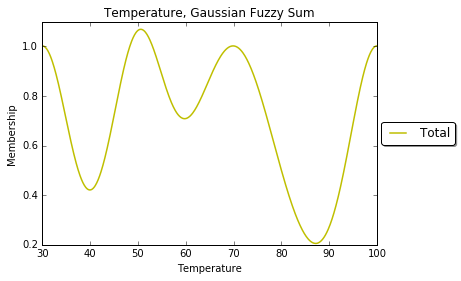

In [3]:
# Plot to show the sum is not always 1
x_sum = x_cold_gauss + x_mild_gauss + \
        x_warm_gauss + x_hot_gauss
plt.figure()
plt.plot(x, x_sum, 'y', linewidth=1.5, label='Total')
plt.title('Temperature, Gaussian Fuzzy Sum')
plt.ylabel('Membership')
plt.xlabel('Temperature')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
          ncol=1, fancybox=True, shadow=True);

As suspected, the membership function does not sum to 100% at each temperature value. There may be situations where this doesn't matter. For instance, if you're using fuzzy logic to determine the most likely descriptor at each temperature value, that the membership doesn't need to sum to 1, since only the maximum value is required. Generally, though, if you are going to be treating the membership function as a probability or using it in a summation somewhere down the line, you want to normalize your membership functions so that they always equal 1.

A quick, easy way to rescale the membership functions so that they sum to 1 is simply to divide by the sum. The following code will normalize the Gaussian membership functions.

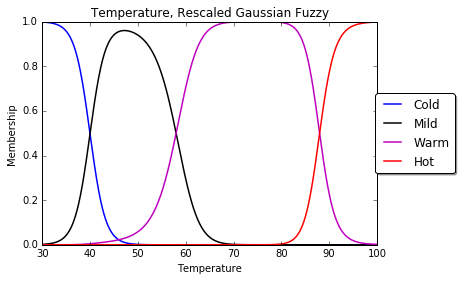

In [4]:
## NORMALIZED GAUSSIAN
# rescale
x_sum = x_cold_gauss + x_mild_gauss + \
        x_warm_gauss + x_hot_gauss
x_cold_rescale = x_cold_gauss / x_sum
x_mild_rescale = x_mild_gauss / x_sum
x_warm_rescale = x_warm_gauss / x_sum
x_hot_rescale = x_hot_gauss / x_sum      

# Plot the results of the rescaled gaussian fuzzy membership
plt.figure()
plt.plot(x, x_cold_rescale, 'b', linewidth=1.5, label='Cold')
plt.plot(x, x_mild_rescale, 'k', linewidth=1.5, label='Mild')
plt.plot(x, x_warm_rescale, 'm', linewidth=1.5, label='Warm')
plt.plot(x, x_hot_rescale, 'r', linewidth=1.5, label='Hot')
plt.title('Temperature, Rescaled Gaussian Fuzzy')
plt.ylabel('Membership')
plt.xlabel('Temperature')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
          ncol=1, fancybox=True, shadow=True);

After normalization, notice that the membership functions no longer look Gaussian. Let's make sure that the membership does sum to 1 at each temperature:

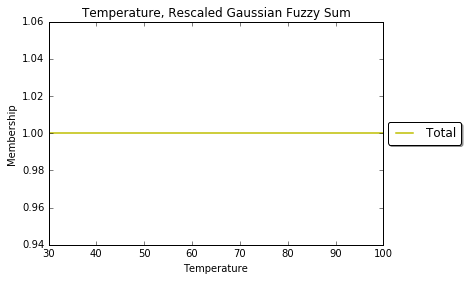

In [5]:
# Plot to show the sum is not always 1
x_sum = x_cold_rescale + x_mild_rescale + \
        x_warm_rescale + x_hot_rescale
plt.figure()
plt.plot(x, x_sum, 'y', linewidth=1.5, label='Total')
plt.title('Temperature, Rescaled Gaussian Fuzzy Sum')
plt.ylabel('Membership')
plt.xlabel('Temperature')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
          ncol=1, fancybox=True, shadow=True);

Even though the shape of the membership function has changed, we can now operate under the conclusion that the memberships sum to 1.